In [54]:
pip install gensim

  Created wheel for smart-open: filename=smart_open-4.1.0-py3-none-any.whl size=106210 sha256=8ebaeb08659ddf646123ff716aa0b30e84aa17b7418b5259af5524fd350cbf68
  Stored in directory: c:\users\nivedhaa\appdata\local\pip\cache\wheels\12\af\e0\2adc6007eb052d6eb4ac8f01c5f699e4bc479f5ba764aadeb6
Successfully built smart-open
  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.15
    Uninstalling Cython-0.29.15:
      Successfully uninstalled Cython-0.29.15
Note: you may need to restart the kernel to use updated packages.


In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.decomposition import PCA
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import make_pipeline
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import roc_curve, roc_auc_score
pd.set_option('Display.max_rows',None)    #Set the max number of rows
pd.set_option('Display.max_columns',None) #Set the max number of columns

In [2]:
df = pd.read_csv('capstone_eda.csv',index_col = 0)
df.head()

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,Country,State,Latitude,Longitude
0,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0,US,NY,39.78373,-100.445882
1,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0,US,IA,39.78373,-100.445882
2,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,US,DC,39.78373,-100.445882
3,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,US,FL,39.78373,-100.445882
4,Accounting Clerk,"US, MD,",NaN,NaN,NaN,Job OverviewApex is an environmental consultin...,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,0,US,MD,39.78373,-100.445882


#### CLUSTERING BASED ON LATITUDE AND LONGITUDE

#### Scaling

In [3]:
ss = StandardScaler()
df_lat_scaled=pd.DataFrame(ss.fit_transform(df[['Latitude','Longitude']]),columns=['Latitude','Longitude'])

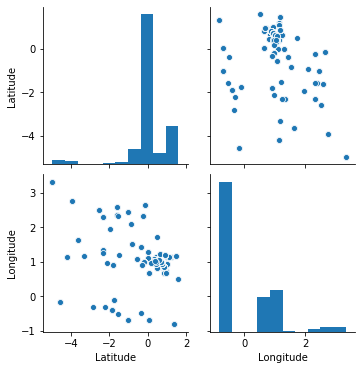

In [4]:
sns.pairplot(df_lat_scaled[['Latitude','Longitude']])
plt.show()

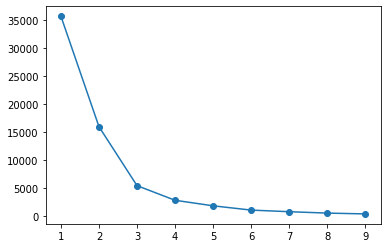

In [5]:
#Elbow Plot
df_lat=df_lat_scaled[['Latitude','Longitude']]
from sklearn.cluster import KMeans
error=[]
for i in range(1,10):
    kmodel=KMeans(n_clusters=i,random_state=0)
    kmodel.fit(df_lat)
    error.append(kmodel.inertia_)
plt.plot(range(1,10),error,marker='o')
plt.show()

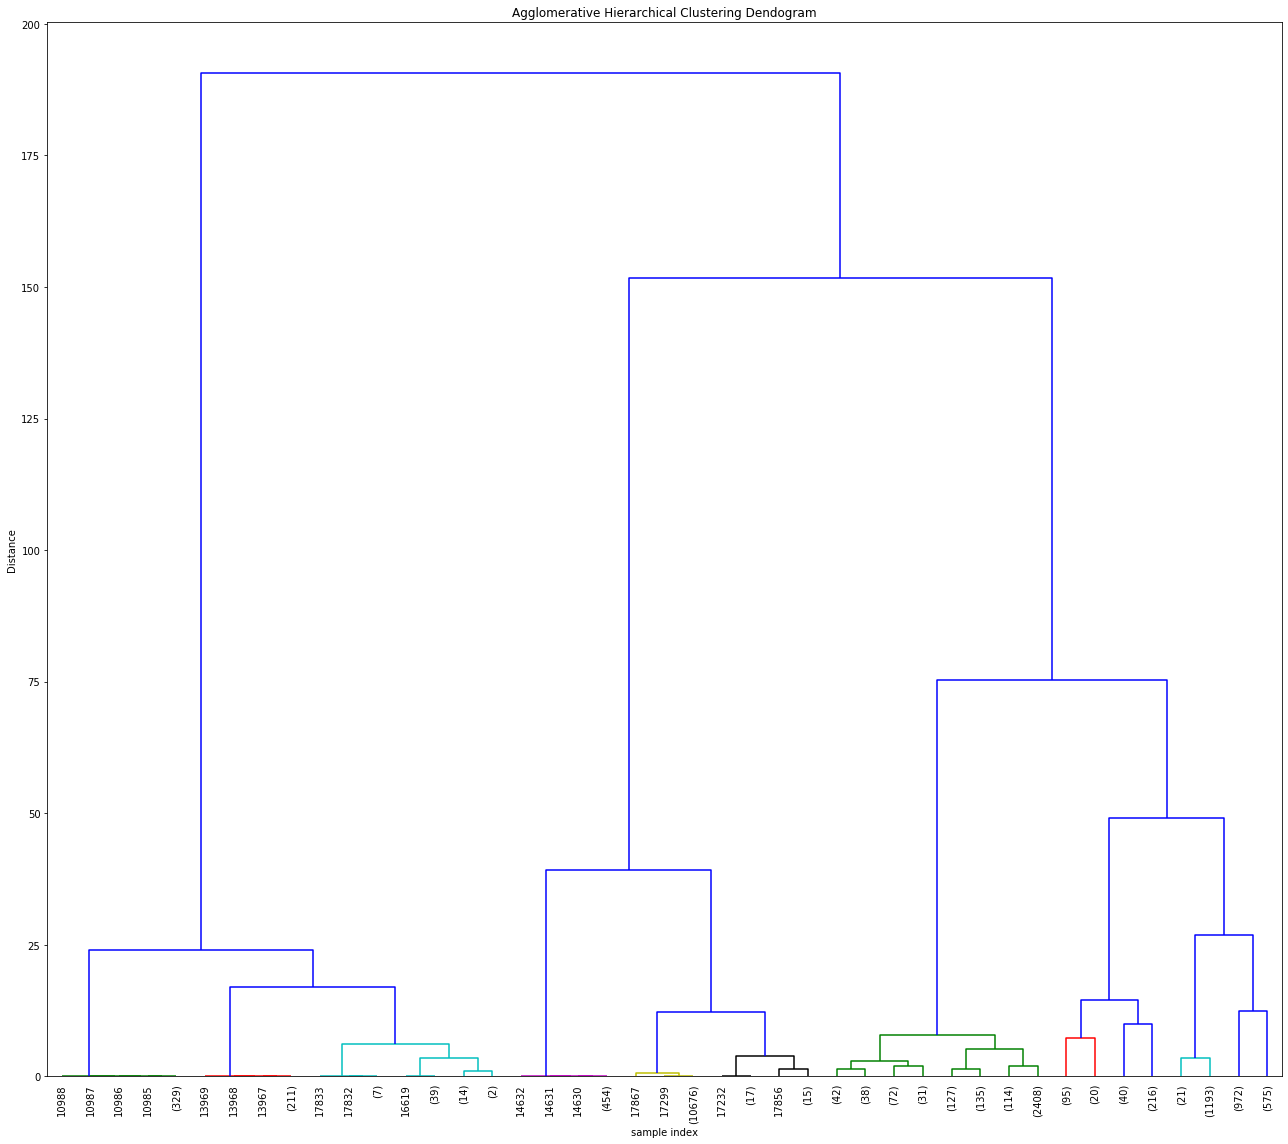

In [6]:
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(18, 16))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(df_lat_scaled[['Latitude','Longitude']], 'ward')
dendrogram(Z,leaf_rotation=90.0,leaf_font_size=10,truncate_mode='level',p=5,color_threshold=8)
plt.tight_layout()

#### KMEANS

In [7]:
kmodel=KMeans(n_clusters=3,random_state=0)
kmodel.fit(df_lat_scaled)
cluster_labels=kmodel.labels_

In [8]:
df['clusters']=cluster_labels

#### DROPPING REDUNDANT COLUMNS

In [9]:
df.drop(columns=['title','location','department','Country','State','Latitude','Longitude'],inplace=True)

In [10]:
df.head()

,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,clusters
0,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0,1
1,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0,1
2,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,1
3,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,1
4,NaN,NaN,Job OverviewApex is an environmental consultin...,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,0,1


#### TREATING NULL VALUES

In [11]:
df.isnull().sum()

salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
clusters                   0
dtype: int64

In [12]:
df['employment_type'].fillna('Missing',inplace=True)
df['required_experience'].fillna('Missing',inplace=True)
df['required_education'].fillna('Missing',inplace=True)
df['industry'].fillna('Missing',inplace=True)
df['function'].fillna('Missing',inplace=True)

#### HANDLING NLP FEATURES

In [13]:
message_cols=['company_profile','description','requirements','benefits']
df_message=df.copy()

In [14]:
for i in message_cols:
    df_message.loc[df_message[i].isnull(),i]='Missing'

In [15]:
df_message[message_cols].isnull().sum()

company_profile    0
description        0
requirements       0
benefits           0
dtype: int64

In [16]:
df_message['message']=df_message['company_profile']+' '+df_message['description']+' '
+df_message['requirements']+' '+df_message['benefits']

0        Experience with content management systems a m...
1        Implement pre-commissioning and commissioning ...
2        EDUCATION: Bachelor’s or Master’s in GIS, busi...
3        QUALIFICATIONS:RN license in the State of Texa...
4                                          Missing Missing
5        Experience with CRM software, live chat, and p...
6        MUST BE A US CITIZEN.An active TS/SCI clearanc...
7        Minimum Requirements:Minimum of 6 months custo...
8        Position : #URL_86fd830a95a64e2b30ceed829e63fd...
9        Requirements:4 – 5 years’ experience in develo...
10       Valid driver's license,Somewhat Clean driving ...
11                                         Missing Missing
12       Must have 5 or more years of experience with D...
13       Job RequirementsAssist in creating client onli...
14       Job Requirements:A reputation as a "go-getter"...
15       JAVA, .NET, SQL, ORACLE, SAP, Informatica, Big...
16                                         Missing Missi

In [17]:
df_message.drop(columns=message_cols,inplace=True)

#### TOKENIZATION AND LEMMATIZATION

In [18]:
lemmatizer=WordNetLemmatizer()
corpus=[]
for rows in range(len(df_message)):
        message=re.sub('[^a-zA-Z\d+]',' ',df_message['message'][rows])
        message=message.lower()
        message=message.split()
        message=[lemmatizer.lemmatize(word)  for word in message   if not word in stopwords.words('english')]
        message=' '.join(message)
        corpus.append(message)

In [19]:
corpus[10]

'growing event production company providing staging scenic drapery primarily state florida secondary location la vega soon adding third location southeast florida small team passionate creating high quality event providing excellent customer service show office event industry installers needed orlando fl near florida mall want work available short notice willing work day weekend night even overtime without complaining fast learner team player posse strong organizational skill installer position available qualified individual afraid hard work getting dirty waste time work demanding willing work hard contribute team fast learner organized able communicate well looking physical work involves heavy lifting moving heavy object getting hand dirty sometimes long day night think handle please feel free contact'

#### COUNT VECTORIZER

In [20]:
cv=CountVectorizer(max_features=5000)
x=np.array(cv.fit_transform(corpus).toarray(),dtype=np.float16) 

In [21]:
x[10]

array([0., 0., 0., ..., 0., 0., 0.], dtype=float16)

In [22]:
feature_names=cv.get_feature_names()
feature_names[:20]

['00',
 '000',
 '00am',
 '00pm',
 '01a736d89d2f0b19de700923d2c312837e180465650804d0f84105352812bf9a',
 '0e92123d11734167533acc44a2e74ffac0b6f56d256225a89769e0641a3d1aee',
 '0fa3f7c5e23a16de16a841e368006cae916884407d90b154dfef3976483a71ae',
 '0in',
 '0pt',
 '10',
 '100',
 '1000',
 '100k',
 '11',
 '113b1bd5d3e5e087c3480c458e2ef299fd3a272612224463899e65ab2fe73995',
 '12',
 '120',
 '13',
 '14',
 '140']

In [23]:
df_upd=pd.DataFrame(x,columns=cv.get_feature_names())
df_upd.head()

00  000  00am  00pm  \
0  0.0  0.0   0.0   0.0   
1  0.0  0.0   0.0   0.0   
2  0.0  0.0   0.0   0.0   
3  0.0  0.0   0.0   0.0   
4  0.0  0.0   0.0   0.0   

   01a736d89d2f0b19de700923d2c312837e180465650804d0f84105352812bf9a  \
0                                                0.0                  
1                                                0.0                  
2                                                0.0                  
3                                                0.0                  
4                                                0.0                  

   0e92123d11734167533acc44a2e74ffac0b6f56d256225a89769e0641a3d1aee  \
0                                                0.0                  
1                                                0.0                  
2                                                0.0                  
3                                                0.0                  
4                                                0.0                  

   0fa3f7c5e23a16de16a841e368006cae916884407d90b154dfef3976483a71ae  0in  0pt  \
0                                                0.0                 0.0  0.0   
1                                                0.0                 0.0  0.0   
2                                                0.0                 0.0  0.0   
3                                                0.0                 0.0  0.0   
4                                                0.0                 0.0  0.0   

    10  100  1000  100k   11  \
0  0.0  0.0   0.0   0.0  0.0   
1  0.0  0.0   0.0   0.0  0.0   
2  0.0  0.0   0.0   0.0  0.0   
3  0.0  0.0   0.0   0.0  0.0   
4  0.0  0.0   0.0   0.0  0.0   

   113b1bd5d3e5e087c3480c458e2ef299fd3a272612224463899e65ab2fe73995   12  120  \
0                                                0.0                 0.0  0.0   
1                                                0.0                 0.0  0.0   
2                                                0.0                 0.0  0.0   
3                                                0.0                 0.0  0.0   
4                                                0.0                 0.0  0.0   

    13   14  140   15  150  1500   16  1600  \
0  0.0  0.0  0.0  0.0  0.0   0.0  0.0   0.0   
1  0.0  0.0  0.0  0.0  0.0   0.0  0.0   0.0   
2  0.0  0.0  0.0  0.0  0.0   0.0  0.0   0.0   
3  0.0  0.0  0.0  0.0  0.0   0.0  0.0   0.0   
4  0.0  0.0  0.0  0.0  0.0   0.0  0.0   0.0   

   169ac3804e2da6e0514e5ef76c29f157f41d80451b486889d9aa   17   18  180  \
0                                                0.0     0.0  0.0  0.0   
1                                                0.0     0.0  0.0  0.0   
2                                                0.0     0.0  0.0  0.0   
3                                                0.0     0.0  0.0  0.0   
4                                                0.0     0.0  0.0  0.0   

   18234f381f5e7b9a9ffdc727cd05c9046edffb45bce85533c8f9b6d0216e925e  1871  \
0                                                0.0                  0.0   
1                                                0.0                  0.0   
2                                                0.0                  0.0   
3                                                0.0                  0.0   
4                                                0.0                  0.0   

   18cc302f4e0f1dac521853b2a6ae109ebbe44c6130d31eb0413535ba71e2f42f  1929  \
0                                                0.0                  0.0   
1                                                0.0                  0.0   
2                                                0.0                  0.0   
3                                                0.0                  0.0   
4                                                0.0                  0.0   

   1943  1950  1956  1960  1970  1972  1976  1982  1988  1989  1992  1994  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1   0.0   0.

In [24]:
df_upd.shape

(17880, 5000)

#### TF-IDF VECTORIZATION

In [25]:
tfv = TfidfVectorizer(stop_words='english',max_features=5000)
x2= np.array(tfv.fit_transform(corpus).toarray(),dtype=np.float16)

In [26]:
x2[10]

array([0., 0., 0., ..., 0., 0., 0.], dtype=float16)

In [27]:
x2.shape

(17880, 5000)

In [28]:
feature_names=tfv.get_feature_names()
feature_names[:10]

['00',
 '000',
 '00am',
 '00pm',
 '01a736d89d2f0b19de700923d2c312837e180465650804d0f84105352812bf9a',
 '0e92123d11734167533acc44a2e74ffac0b6f56d256225a89769e0641a3d1aee',
 '0fa3f7c5e23a16de16a841e368006cae916884407d90b154dfef3976483a71ae',
 '0in',
 '0pt',
 '10']

In [29]:
df_upd1=pd.DataFrame(x2,columns=tfv.get_feature_names())
df_upd1.head()

00  000  00am  00pm  \
0  0.0  0.0   0.0   0.0   
1  0.0  0.0   0.0   0.0   
2  0.0  0.0   0.0   0.0   
3  0.0  0.0   0.0   0.0   
4  0.0  0.0   0.0   0.0   

   01a736d89d2f0b19de700923d2c312837e180465650804d0f84105352812bf9a  \
0                                                0.0                  
1                                                0.0                  
2                                                0.0                  
3                                                0.0                  
4                                                0.0                  

   0e92123d11734167533acc44a2e74ffac0b6f56d256225a89769e0641a3d1aee  \
0                                                0.0                  
1                                                0.0                  
2                                                0.0                  
3                                                0.0                  
4                                                0.0                  

   0fa3f7c5e23a16de16a841e368006cae916884407d90b154dfef3976483a71ae  0in  0pt  \
0                                                0.0                 0.0  0.0   
1                                                0.0                 0.0  0.0   
2                                                0.0                 0.0  0.0   
3                                                0.0                 0.0  0.0   
4                                                0.0                 0.0  0.0   

    10  100  1000  100k   11  \
0  0.0  0.0   0.0   0.0  0.0   
1  0.0  0.0   0.0   0.0  0.0   
2  0.0  0.0   0.0   0.0  0.0   
3  0.0  0.0   0.0   0.0  0.0   
4  0.0  0.0   0.0   0.0  0.0   

   113b1bd5d3e5e087c3480c458e2ef299fd3a272612224463899e65ab2fe73995  115   12  \
0                                                0.0                 0.0  0.0   
1                                                0.0                 0.0  0.0   
2                                                0.0                 0.0  0.0   
3                                                0.0                 0.0  0.0   
4                                                0.0                 0.0  0.0   

   120   13   14  140   15  150  1500   16  1600  \
0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0   0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0   0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0   0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0   0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0   0.0   

   169ac3804e2da6e0514e5ef76c29f157f41d80451b486889d9aa   17   18  180  \
0                                                0.0     0.0  0.0  0.0   
1                                                0.0     0.0  0.0  0.0   
2                                                0.0     0.0  0.0  0.0   
3                                                0.0     0.0  0.0  0.0   
4                                                0.0     0.0  0.0  0.0   

   18234f381f5e7b9a9ffdc727cd05c9046edffb45bce85533c8f9b6d0216e925e  1871  \
0                                                0.0                  0.0   
1                                                0.0                  0.0   
2                                                0.0                  0.0   
3                                                0.0                  0.0   
4                                                0.0                  0.0   

   18cc302f4e0f1dac521853b2a6ae109ebbe44c6130d31eb0413535ba71e2f42f  1929  \
0                                                0.0                  0.0   
1                                                0.0                  0.0   
2                                                0.0                  0.0   
3                                                0.0                  0.0   
4                                                0.0                  0.0   

   1943  1950  1956  1960  1970  1972  1976  1982      1988  1989  1992  1994  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.00

#### ONE-HOT ENCODING

In [30]:
df.drop(columns=['salary_range','company_profile','description','requirements','benefits'],inplace=True)

In [31]:
df_fr=df.drop(columns=['fraudulent'])

In [32]:
df_encoded=pd.get_dummies(df_fr,drop_first=True)

In [33]:
df_model=pd.concat((df_encoded,df_upd1),axis=1)
df_model.head()

telecommuting  has_company_logo  has_questions  clusters  \
0              0                 1              0         1   
1              0                 1              0         1   
2              0                 1              0         1   
3              0                 1              1         1   
4              0                 0              0         1   

   employment_type_Full-time  employment_type_Missing  employment_type_Other  \
0                          0                        0                      1   
1                          0                        1                      0   
2                          1                        0                      0   
3                          1                        0                      0   
4                          0                        1                      0   

   employment_type_Part-time  employment_type_Temporary  \
0                          0                          0   
1                          0                          0   
2                          0                          0   
3                          0                          0   
4                          0                          0   

   required_experience_Director  required_experience_Entry level  \
0                             0                                0   
1                             0                                0   
2                             0                                0   
3                             0                                0   
4                             0                                0   

   required_experience_Executive  required_experience_Internship  \
0                              0                               1   
1                              0                               0   
2                              0                               0   
3                              0                               0   
4                              0                               0   

   required_experience_Mid-Senior level  required_experience_Missing  \
0                                     0                            0   
1                                     0                            1   
2                                     1                            0   
3                                     1                            0   
4                                     0                            1   

   required_experience_Not Applicable  required_education_Bachelor's Degree  \
0                                   0                                     0   
1                                   0                                     0   
2                                   0                                     1   
3                                   0                                     1   
4                                   0                                     0   

   required_education_Certification  required_education_Doctorate  \
0                                 0                             0   
1                                 0                             0   
2                                 0                             0   
3                                 0                             0   
4                                 0                             0   

   required_education_High School or equivalent  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   required_education_Master's Degree  required_education_Missing  \
0                                   0                           1   
1                                   0                           1   
2                                   0                           0   
3                                   0                           

In [34]:
df_model.shape

(17880, 5197)

### MODEL BUILDING

#### Train-test split

In [35]:
y = df['fraudulent']
xtrain,xtest,ytrain,ytest=train_test_split(df_model,y,test_size=0.2,random_state=0)

#### Multinomial Naive Bayes

In [36]:
nb=MultinomialNB()
nb.fit(xtrain,ytrain)
ypredtest=nb.predict(xtest)

In [37]:
print('Accuracy:',accuracy_score(ytest,ypredtest))

Accuracy: 0.9717561521252797


In [38]:
print(confusion_matrix(ytest,ypredtest))
print(classification_report(ytest,ypredtest))

[[3406   10]
 [  91   69]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      3416
           1       0.87      0.43      0.58       160

    accuracy                           0.97      3576
   macro avg       0.92      0.71      0.78      3576
weighted avg       0.97      0.97      0.97      3576



#### Random Forest

In [39]:
RF=RandomForestClassifier(n_estimators=100)
RF.fit(xtrain,ytrain)
ypredtest=RF.predict(xtest)

In [40]:
print('Accuracy',accuracy_score(ytest,ypredtest))

Accuracy 0.985738255033557


In [41]:
print(confusion_matrix(ytest,ypredtest))
print(classification_report(ytest,ypredtest))

[[3415    1]
 [  50  110]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3416
           1       0.99      0.69      0.81       160

    accuracy                           0.99      3576
   macro avg       0.99      0.84      0.90      3576
weighted avg       0.99      0.99      0.98      3576



#### XGBClassifier

In [44]:
xgboost = XGBClassifier()
xgboost.fit(xtrain,ytrain)
y_pred=xgboost.predict(xtest)
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3416
           1       0.92      0.76      0.84       160

    accuracy                           0.99      3576
   macro avg       0.96      0.88      0.91      3576
weighted avg       0.99      0.99      0.99      3576



In [45]:
print('Accuracy',accuracy_score(ytest,y_pred))

Accuracy 0.9865771812080537


In [46]:
print(confusion_matrix(ytest,y_pred))
print(classification_report(ytest,y_pred))

[[3406   10]
 [  38  122]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3416
           1       0.92      0.76      0.84       160

    accuracy                           0.99      3576
   macro avg       0.96      0.88      0.91      3576
weighted avg       0.99      0.99      0.99      3576



#### FEATURE SELECTION USING SELECTKBEST

In [48]:
skb=SelectKBest(f_classif,k=200)
skb.fit_transform(df_model,y)

array([[1.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.        , 1.        , ..., 0.09234619, 0.        ,
        0.11523438],
       ...,
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 1.        , 0.        , ..., 0.06652832, 0.        ,
        0.        ],
       [1.        , 1.        , 2.        , ..., 0.        , 0.        ,
        0.        ]])

In [49]:
skb_feat=pd.DataFrame()
skb_feat['Features']=df_model.columns
skb_feat['P-values']=skb.pvalues_
skb_feat.head()

,Features,P-values
0,telecommuting,3.887303e-06
1,has_company_logo,2.213970e-278
2,has_questions,1.203555e-34
3,clusters,9.624981e-44
4,employment_type_Full-time,1.046179e-07


In [53]:
best_features=skb_feat[skb_feat['P-values']>0.05]['Features']
best_features[:10]

6                                 employment_type_Other
9                          required_experience_Director
11                        required_experience_Executive
15                   required_experience_Not Applicable
18                         required_education_Doctorate
22                      required_education_Professional
23    required_education_Some College Coursework Com...
25                       required_education_Unspecified
26                        required_education_Vocational
27               required_education_Vocational - Degree
Name: Features, dtype: object

In [54]:
X_new=df_model[best_features]
X_new.shape

(17880, 3129)

### MODEL BUILDING AFTER SELECTKBEST

In [55]:
xtrain,xtest,ytrain,ytest=train_test_split(X_new,y,test_size=0.2,random_state=0)

#### Multinomial Naive Bayes

In [56]:
nb=MultinomialNB()
nb.fit(xtrain,ytrain)
ypredtest=nb.predict(xtest)

In [58]:
print('Accuracy:',accuracy_score(ytest,ypredtest))

Accuracy: 0.9552572706935123


In [59]:
print(confusion_matrix(ytest,ypredtest))
print(classification_report(ytest,ypredtest))

[[3416    0]
 [ 160    0]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3416
           1       0.00      0.00      0.00       160

    accuracy                           0.96      3576
   macro avg       0.48      0.50      0.49      3576
weighted avg       0.91      0.96      0.93      3576



C:\Users\Nivedhaa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### XGBClassifier

In [60]:
xgboost = XGBClassifier()
xgboost.fit(xtrain,ytrain)
y_pred=xgboost.predict(xtest)
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3416
           1       0.94      0.53      0.67       160

    accuracy                           0.98      3576
   macro avg       0.96      0.76      0.83      3576
weighted avg       0.98      0.98      0.97      3576



### PCA IMPLEMENTATION

In [62]:
model=PCA(n_components=300)
pca_model=model.fit_transform(df_model)

In [63]:
ratio=sorted(model.explained_variance_ratio_*100,reverse=True)
np.cumsum(ratio)   # nearly 92% explained variance

array([17.70229832, 24.21573815, 29.89085532, 35.24574362, 39.25866264,
       42.38781669, 45.16651378, 47.49909528, 49.66845639, 51.76475732,
       53.70628403, 55.35151255, 56.85143931, 58.30169674, 59.6951033 ,
       61.00668632, 62.09776355, 63.13630435, 64.14289747, 65.09428621,
       66.02448712, 66.86245803, 67.66538011, 68.41885461, 69.13317908,
       69.78471646, 70.34001516, 70.87012154, 71.37761957, 71.82087842,
       72.21370804, 72.58772116, 72.95938869, 73.31186947, 73.64343895,
       73.94770053, 74.24793221, 74.53131011, 74.8048873 , 75.07109748,
       75.32413378, 75.57447226, 75.80909222, 76.03993771, 76.26398626,
       76.47719635, 76.68586127, 76.88384122, 77.07876933, 77.2654532 ,
       77.44382499, 77.61955827, 77.7943872 , 77.95678762, 78.11111735,
       78.2591737 , 78.40424031, 78.54549244, 78.68589837, 78.82404912,
       78.96090689, 79.09691143, 79.23137836, 79.3635658 , 79.49252022,
       79.62068754, 79.7472423 , 79.87175305, 79.99525977, 80.11

### MODEL BUILDING AFTER PCA

In [64]:
xtrain,xtest,ytrain,ytest=train_test_split(pca_model,y,test_size=0.2,random_state=0)

#### Random Forest

In [68]:
RF=RandomForestClassifier(n_estimators = 200)
RF.fit(xtrain,ytrain)
ypredtest=RF.predict(xtest)
print(accuracy_score(ytest,ypredtest))
print(confusion_matrix(ytest,ypredtest))
print(classification_report(ytest,ypredtest))

0.9787472035794184
[[3415    1]
 [  75   85]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3416
           1       0.99      0.53      0.69       160

    accuracy                           0.98      3576
   macro avg       0.98      0.77      0.84      3576
weighted avg       0.98      0.98      0.98      3576



#### XGBoost

In [70]:
xgboost = XGBClassifier()
xgboost.fit(xtrain,ytrain)
y_pred=xgboost.predict(xtest)
print(accuracy_score(ytest,y_pred))
print(confusion_matrix(ytest,y_pred))
print(classification_report(ytest,y_pred))

0.9815436241610739
[[3408    8]
 [  58  102]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3416
           1       0.93      0.64      0.76       160

    accuracy                           0.98      3576
   macro avg       0.96      0.82      0.87      3576
weighted avg       0.98      0.98      0.98      3576



### HANDLING DATA IMBALANCE

In [72]:
class0=10000
class1=5000
pipe=make_pipeline(
SMOTE(sampling_strategy={1:class1}),
NearMiss(sampling_strategy={0:class0})
)

In [73]:
xbal,ybal=pipe.fit_resample(df_model,y)
xbal.shape,ybal.shape

((15000, 5197), (15000,))

### MODEL BUILDING AFTER HANDLING DATA IMBALANCE

In [74]:
xtrain,xtest,ytrain,ytest=train_test_split(xbal,ybal,test_size=0.2,random_state=0)

#### MultinomialNB

In [75]:
nb=MultinomialNB()
nb.fit(xtrain,ytrain)
ypredtest=nb.predict(xtest)
print(accuracy_score(ytest,ypredtest))
print(confusion_matrix(ytest,ypredtest))
print(classification_report(ytest,ypredtest))

0.928
[[1885  105]
 [ 111  899]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      1990
           1       0.90      0.89      0.89      1010

    accuracy                           0.93      3000
   macro avg       0.92      0.92      0.92      3000
weighted avg       0.93      0.93      0.93      3000



#### Random Forest

In [77]:
RF=RandomForestClassifier(n_estimators=100)
RF.fit(xtrain,ytrain)
ypredtest=RF.predict(xtest)
print(accuracy_score(ytest,ypredtest))
print(confusion_matrix(ytest,ypredtest))
print(classification_report(ytest,ypredtest))

0.99
[[1987    3]
 [  27  983]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1990
           1       1.00      0.97      0.98      1010

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000



#### XGBoost

In [78]:
xgboost = XGBClassifier()
xgboost.fit(xtrain,ytrain)
y_pred=xgboost.predict(xtest)
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1990
           1       0.98      0.98      0.98      1010

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000



#### Adaboost

In [81]:
adb = AdaBoostClassifier()
adb.fit(xtrain,ytrain)
y_pred_adb=adb.predict(xtest)
print(accuracy_score(ytest,y_pred_adb))
print(confusion_matrix(ytest,y_pred_adb))
print(classification_report(ytest,y_pred_adb))

0.9333333333333333
[[1880  110]
 [  90  920]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      1990
           1       0.89      0.91      0.90      1010

    accuracy                           0.93      3000
   macro avg       0.92      0.93      0.93      3000
weighted avg       0.93      0.93      0.93      3000



#### PCA

In [82]:
model=PCA(n_components=300)
pca_model=model.fit_transform(xbal)

In [83]:
ratio=sorted(model.explained_variance_ratio_*100,reverse=True)
np.cumsum(ratio)[-1] 

90.79801790561382

### MODEL BUILDING AFTER PCA

In [91]:
xtrain,xtest,ytrain,ytest=train_test_split(pca_model,ybal,test_size=0.2,random_state=0)

#### Random Forest

In [92]:
RF=RandomForestClassifier(n_estimators=100)
RF.fit(xtrain,ytrain)
y_pred_rf=RF.predict(xtest)
print(accuracy_score(ytest,y_pred_rf))
print(confusion_matrix(ytest,y_pred_rf))
print(classification_report(ytest,y_pred_rf))

0.974
[[1984    6]
 [  72  938]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1990
           1       0.99      0.93      0.96      1010

    accuracy                           0.97      3000
   macro avg       0.98      0.96      0.97      3000
weighted avg       0.97      0.97      0.97      3000



#### Adaboost

In [93]:
adb = AdaBoostClassifier()
adb.fit(xtrain,ytrain)
y_pred_adb=adb.predict(xtest)
print(accuracy_score(ytest,y_pred_adb))
print(confusion_matrix(ytest,y_pred_adb))
print(classification_report(ytest,y_pred_adb))

0.9033333333333333
[[1870  120]
 [ 170  840]]
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1990
           1       0.88      0.83      0.85      1010

    accuracy                           0.90      3000
   macro avg       0.90      0.89      0.89      3000
weighted avg       0.90      0.90      0.90      3000



#### XGboost

In [94]:
xgboost = XGBClassifier()
xgboost.fit(xtrain,ytrain)
y_pred_xgb=xgboost.predict(xtest)
print(accuracy_score(ytest,y_pred_xgb))
print(confusion_matrix(ytest,y_pred_xgb))
print(classification_report(ytest,y_pred_xgb))

0.9816666666666667
[[1963   27]
 [  28  982]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1990
           1       0.97      0.97      0.97      1010

    accuracy                           0.98      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.98      0.98      0.98      3000



#### SVC

In [95]:
svc = SVC()
svc.fit(xtrain, ytrain)
y_pred_svc = svc.predict(xtest)
print(accuracy_score(ytest,y_pred_svc))
print(confusion_matrix(ytest,y_pred_svc))
print(classification_report(ytest,y_pred_svc))

0.9733333333333334
[[1965   25]
 [  55  955]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1990
           1       0.97      0.95      0.96      1010

    accuracy                           0.97      3000
   macro avg       0.97      0.97      0.97      3000
weighted avg       0.97      0.97      0.97      3000



### MODEL COMPARISON TABLE

In [96]:
results_table = pd.DataFrame(columns = ['models', 'fpr','tpr','auc'])

predictions = {'RF': y_pred_rf, 'AdaBoost': y_pred_adb, 'XGB': y_pred_xgb ,'SVC': y_pred_svc}

for key in predictions:
    fpr, tpr, _ = roc_curve(ytest, predictions[key])
    auc = roc_auc_score(ytest, predictions[key])
    acc = accuracy_score(ytest,predictions[key])
    
    results_table = results_table.append({'models': key,
                                         #'fpr' : fpr[1],
                                         'recall score' : tpr[1],
                                         'auc' : auc,
                                         'accuracy' : acc}, ignore_index=True)
    
results_table.set_index('models', inplace=True)

In [97]:
models = pd.DataFrame(results_table)
models.drop('tpr',axis=1)
models.drop(['fpr','tpr'],axis=1)

,auc,accuracy,recall score
models,,,
RF,0.962849,0.974000,0.928713
AdaBoost,0.885691,0.903333,0.831683
XGB,0.979355,0.981667,0.972277
SVC,0.966491,0.973333,0.945545


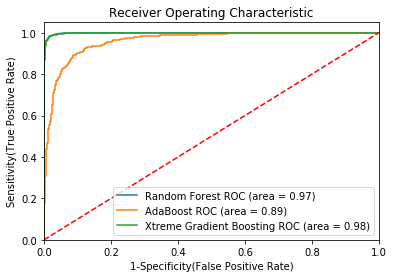

In [105]:
import matplotlib.pyplot as plt

plt.figure()

# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'Random Forest',
    'model': RandomForestClassifier(),
},
{
    'label': 'AdaBoost',
    'model': AdaBoostClassifier(),
},
{
    'label': 'Xtreme Gradient Boosting',
    'model': XGBClassifier(),
}
]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(xtrain, ytrain) # train the model
    y_pred=model.predict(xtest) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(ytest, model.predict_proba(xtest)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(ytest,model.predict(xtest))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display